In [1]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import math
import warnings
import numpy as np
from datetime import datetime
import matplotlib

# Example: Matplotlib basics

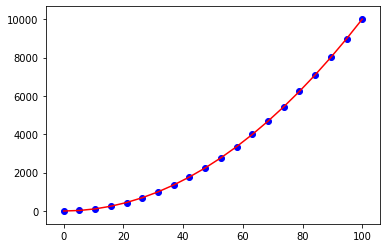

In [6]:
fig = plt.figure()
x = np.linspace(0,100,20)
y = x**2
plt.plot(x,y,color='red')
plt.scatter(x,y,color='blue')
# plt.xlim(20,40)
# plt.ylim(2000,6000)

# Example: updating a plot in place

In [7]:
def updatePlot(obj=None):
    fig = plt.figure()
    ax = plt.gca()
    hdisplay = display.display("", display_id=True)
    while obj != 'quit':
        obj = input('Enter a number')
        if obj == 'quit':
            plt.close()
            break
        n = int(obj)
        ax.scatter(n,n**2)
        hdisplay.update(fig)

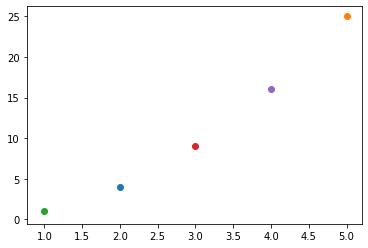

Enter a number2
Enter a number5
Enter a number1
Enter a number3
Enter a number4
Enter a numberquit


In [8]:
updatePlot()

# Example: kwargs

In [9]:
def plotRectangle(**kwargs):
    fig = plt.figure()
    ax = fig.gca()
    sq = plt.Rectangle((0,0), 2,2,**kwargs)
    ax.add_patch(sq)
    ax.set_xlim(-1,3)
    ax.set_ylim(-1,3)

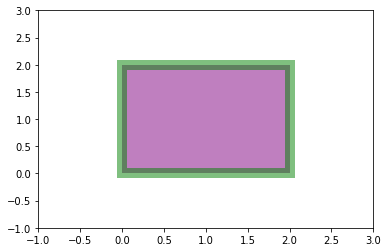

In [14]:
plotRectangle(facecolor='purple', edgecolor='green', linewidth=10, alpha=0.5)

# Task: Visualize Circle class

Fill out the plotCircle() method and fill out the init function to allow visualization of your circle class. You should be able to plot multiple circles on the same figure, and update the plot as you update your circle's parameters.

In [3]:
def getTime():
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S:%f")
    return current_time

class Circle():
    """
    Function to create and edit a circle while calculating parameters and keeping track of previous changes to the circle.
    
    Parameters:
    ----------
    radius: Float
        Radius of the circle. Default is None.
    circum: Float
        Circumference of the circle. Default is None.
    area: Float
        Area of the circle. Default is None.
    history: Dict
        Dictionary tracking all chnages made to the size of the circle. Keys are the time the change was made and values are the new size (radius, circumference, area). Default is None.
    disp: Boolean
        Choose whether or not to display the circle. Default is False.
        
    Returns:
    ----------
    calcCircle: Float
        Calculates and returns the radius, circumference, and area. Updates all three parameters.
    calcRadius: Float
        Calculates and returns the radius of the circle, and updates the radius parameter.
    calcCircum: Float
        Calculates and returns the circumference of the circle, and updates the circumference parameter.
    calcArea: Float
        Calculates and returns the area of the circle, and updates the area parameter.
    """
    def __init__(self, radius = None, circum = None, area = None, history = {},disp=False,ax=None,
                 fig=None,hdisplay=None,pos=(0,0),**kwargs):
        self.radius = radius
        self.circum = circum
        self.area = area
        self.history = history
        self.checkParams()
        self.calcCircle()
        self.circle = None
        
        ####### New params for visualization #######
        # Assign new inputs to self
        self.disp = disp
        self.pos = pos
        self.kwargs = kwargs
        if disp is True:
            if fig==None and ax==None and hdisplay==None:
                # Initialize new figure
                fig = plt.figure()
                ax = plt.gca()
                hdisplay = display.display("", display_id=True)
                ax.set_xlim(self.pos[0]-1.5*self.radius,self.pos[0]+1.5*self.radius)
                ax.set_ylim(self.pos[1]-1.5*self.radius,self.pos[1]+1.5*self.radius)
                plt.close()
            elif fig==None or ax==None or hdisplay==None:
                #Raise an error here
                raise TypeError('Must pass in all fig, ax, hdisplay or none.')
            self.ax = ax
            self.fig = fig
            self.hdisplay = hdisplay
            self.plotCircle()
            # Assign figure modifiers to self and call plotCircle

    def calcCircle(self):
        if self.radius != None:
            self.circum = 2*math.pi*self.radius
            self.area = math.pi*(self.radius**2)
        elif self.circum != None:
            self.radius = self.circum/(2*math.pi)
            self.area = math.pi*(self.radius**2)
        elif self.area != None:
            self.radius = math.sqrt(self.area/math.pi)
            self.circum = 2*math.pi*self.radius
        else:
            raise TypeError('All of the parameters are None.')
    def checkParams(self):
        params = np.asarray([self.radius, self.circum, self.area])
        params[params == None] = 0
#         print(params)
        numSet = sum(x != 0 for x in params)  
        if numSet > 1:
            if params[1] != params[0]*2*math.pi and params[0] != 0 and params[1] != 0:
                warnings.warn('The radius and circumference conflict. Calculating the parameters based on the the radius.')
            if params[2] != params[0]**2*math.pi and params[0] != 0 and params[2] != 0:
                warnings.warn('The radius and area conflict. Calculating the parameters based on the radius.')
            if params[1] != 0 and params[2] != 0 and params[0] == 0:
                radTemp = params[1]/(2*math.pi)
                areaTemp = radTemp**2*math.pi
                if params[2] != areaTemp:
                    warnings.warn('The circumference and area conflict. Calculating the paramters based on the circumference.')
    def calcRadius(self):
        self.calcCircle()
        return self.radius
    def calcCircum(self):
        self.calcCircle()
        return self.circum
    def calcArea(self):
        self.calcCircle()
        return self.area
    
    def expand(self, parameter, factor):
        try:
            factor = float(factor)
        except:
            raise TypeError('Enter a number for the factor.')
        if factor < 0:
            factor *= -1
            warnings.warn(f'The entered factor was negative. Calculating based on the additive inverse, {factor}.')
        if parameter == "r" or parameter == "c" or parameter == "a":
            if parameter == "r":
                self.radius *= factor
                self.circum = None
                self.area = None
            elif parameter == "c":
                self.radius = None
                self.circum *= factor
                self.area = None
            elif parameter == "a":
                self.radius = None
                self.circum = None
                self.area *= factor
            self.calcCircle()
            self.history[getTime()] = [self.radius, self.circum, self.area]
        else:
            raise TypeError('Enter radius (r), circumference (c), or area (a) for the parameter to expand.')
        if self.disp is True:
            self.plotCircle()
    
    def plotCircle(self):
        if self.circle != None:
            self.circle.remove()
        self.circle = plt.Circle(self.pos, self.radius, **self.kwargs)
        self.ax.add_patch(self.circle)
        print(self.circle.figure)
        xlim = np.asarray(self.ax.get_xlim())
        ylim = np.asarray(self.ax.get_ylim())
#         print(xlim[1])
#         print(self.pos[0])
#         print(abs(xlim[1] - self.pos[0]))
#         print(self.radius)
        if xlim[0] >= self.pos[0]-1.5*self.radius:
            xlim[0] = self.pos[0]-1.5*self.radius
        if xlim[1] <= self.pos[0]+1.5*self.radius:
            xlim[1] = self.pos[0]+1.5*self.radius
        self.ax.set_xlim(xlim)
        if ylim[0] >= self.pos[1]-1.5*self.radius:
            ylim[0] = self.pos[1]-1.5*self.radius
        if ylim[1] <= self.pos[1]+1.5*self.radius:
            ylim[1] = self.pos[1]+1.5*self.radius
        self.ax.set_ylim(ylim)
#         if abs(xlim[0] - self.pos[0]) <= self.radius:
#             xlim[0] = self.pos[0]-1.5*self.radius
# #             print('1')
#         if abs(xlim[1] - self.pos[0]) >= self.radius:
#             xlim[1] = self.pos[0]+1.5*self.radius
# #             print('2')
        
#         if abs(ylim[0] - self.pos[1]) <= self.radius:
#             ylim[0] = self.pos[1]-1.5*self.radius
# #             print('3')
#         if abs(ylim[1] - self.pos[1]) >= self.radius:
#             ylim[1] = self.pos[1]+1.5*self.radius
# #             print('4')
        self.ax.set_aspect('equal')
        self.hdisplay.update(self.fig)
    

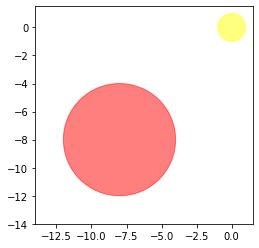

Figure(432x288)


In [32]:
c = Circle(radius=1, disp=True, color='yellow',alpha=0.5)

In [29]:
c.expand('r',8)

Figure(432x288)


In [33]:
c2 = Circle(radius=4,fig=c.fig,ax=c.ax,hdisplay=c.hdisplay,disp=True,color='red',pos=(-8,-8),alpha=0.5)

Figure(432x288)


In [31]:
c2.expand('r',16)

Figure(432x288)


# Task: Visualize Binary Tree

In [14]:
import numpy as np

class BinaryTree:
    def __init__(self, root=None,ax=None,fig=None,hdisplay=None):
        self.root = root
        self.ax = ax
        self.fig = fig
        self.hdisplay = hdisplay
    def findParent(self, x, foundParent=None):
        if foundParent == None:
            foundParent = self.root
        if foundParent.hasRight() and x > foundParent.data:
            return self.findParent(x, foundParent.rightChild)
        if foundParent.hasLeft() and x < foundParent.data:
            return self.findParent(x, foundParent.leftChild)
        return foundParent
    def newNode(self, x):
        newParent = self.findParent(x)
        if x > newParent.data:
            return newParent.setRight(x)
        if x < newParent.data:
            return newParent.setLeft(x)
    def setHeight(self, height):
        self.height = height     
        

class BinaryTreeNode:
    def __init__(self, data=None, parent=None, leftChild=None, rightChild=None, disp=False,ax=None,
                 fig=None,hdisplay=None,pos=(0,0),width=500,**kwargs):
        self.data = data
        self.parent = parent
        self.leftChild = leftChild
        self.rightChild = rightChild
        self.width = width
        if self.parent == None:
            self.depth = 0
            self.tree = BinaryTree(root=self,ax=ax,fig=fig,hdisplay=hdisplay)
            self.tree.setHeight(0)
            self.tree.numNodes = 1
        else:
            self.depth = parent.depth + 1
            self.tree = parent.tree
            if self.depth > self.tree.height:
                self.tree.setHeight(self.depth)
            self.tree.numNodes += 1
            
        self.disp = disp
        self.pos = pos
        self.kwargs = kwargs
        self.ax = ax
        self.fig = fig
        self.hdisplay = hdisplay
        
        self.isDisp = False
        if self.disp:
            self.makeFig()
            self.plotTree()
        
    def makeFig(self):
        if self.tree.fig == None:
            if self.fig==None and self.ax==None and self.hdisplay==None:
                # Initialize new figure
                fig = plt.figure(figsize=(16,10))
                ax = plt.gca()
                hdisplay = display.display("", display_id=True)
                plt.close()
            elif self.fig==None or self.ax==None or self.hdisplay==None:
                #Raise an error here
                raise TypeError('Must pass in all fig, ax, hdisplay or none.')
            self.ax = ax
            self.fig = fig
            self.hdisplay = hdisplay
            self.tree.ax = ax
            self.tree.fig = fig
            self.tree.hdisplay = hdisplay
#             print('it got here')
        else:
            self.ax = self.tree.ax
            self.fig = self.tree.fig
            self.hdisplay = self.tree.hdisplay
#             print('now it got here')
    
    def setLeft(self, childData):
        newpos = (self.pos[0]-self.width/(2**(self.depth+1)),self.pos[1]-10)
        self.leftChild = BinaryTreeNode(data=childData, parent=self, pos=newpos, width=self.width, disp=self.disp,ax=self.ax,
                 fig=self.fig,hdisplay=self.hdisplay, **self.kwargs)
        return self.leftChild
    def setRight(self,childData):
        newpos = (self.pos[0]+self.width/(2**(self.depth+1)),self.pos[1]-10)
        self.rightChild = BinaryTreeNode(data=childData, parent=self, pos=newpos, width=self.width, disp=self.disp,ax=self.ax,
                 fig=self.fig,hdisplay=self.hdisplay, **self.kwargs)
        return self.rightChild
    def children(self):
        childList = []
        if self.hasLeft():
            childList.append(self.leftChild)
        if self.hasRight():
            childList.append(self.rightChild)
        return childList
    def hasLeft(self):
        if self.leftChild == None:
            return False
        else:
            return True
    def hasRight(self):
        if self.rightChild == None:
            return False
        else:
            return True
    def isRoot(self):
        if self.parent == None:
            return True
        else:
            return False
    def plotTree(self):
        ###### Fill this in
        self.makeFig()
        if 'colorscheme' not in self.kwargs.keys():
            nodecolor='red'
        elif self.kwargs['colorscheme'] == 'byrow':
            cmap = matplotlib.cm.get_cmap('Spectral')
            nodecolor = cmap((self.depth%5)/4)
        elif self.kwargs['colorscheme'] == 'byindex':
            cmap = matplotlib.cm.get_cmap('Spectral')
            nodecolor = cmap(self.kwargs['nodeIndex']/self.tree.numNodes)
        self.ax.scatter(self.pos[0],self.pos[1],zorder=1,s=750, color=nodecolor)
        self.ax.text(self.pos[0],self.pos[1],math.trunc(self.data),color='black',verticalalignment='center',horizontalalignment='center',fontsize=14)
#         if 'whichfirst' not in self.kwargs.keys():
#             if not self.isRoot():
#                 self.ax.plot([self.parent.pos[0],self.pos[0]],[self.parent.pos[1],self.pos[1]],color='black',zorder=0)
#         elif self.kwargs['whichfirst'] == 'child':
#             if self.hasRight():
#                 self.ax.plot([self.rightChild.pos[0],self.pos[0]],[self.rightChild.pos[1],self.pos[1]],color='black',zorder=0)
#             if self.hasLeft():
#                 self.ax.plot([self.leftChild.pos[0],self.pos[0]],[self.leftChild.pos[1],self.pos[1]],color='black',zorder=0)
        if self.hasRight() and self.rightChild.isDisp == True:
                self.ax.plot([self.rightChild.pos[0],self.pos[0]],[self.rightChild.pos[1],self.pos[1]],color='black',zorder=0)
        if self.hasLeft() and self.leftChild.isDisp == True:
                self.ax.plot([self.leftChild.pos[0],self.pos[0]],[self.leftChild.pos[1],self.pos[1]],color='black',zorder=0)
        if not self.isRoot() and self.parent.isDisp == True:
                self.ax.plot([self.parent.pos[0],self.pos[0]],[self.parent.pos[1],self.pos[1]],color='black',zorder=0)
        self.ax.set_aspect('auto')
        self.hdisplay.update(self.fig)
        self.isDisp = True

def addNodes(tree):
    data = None
    while data != 'stop':
        data = input('New node data: ')
        if data=='stop':
            break
        tree.newNode(float(data))


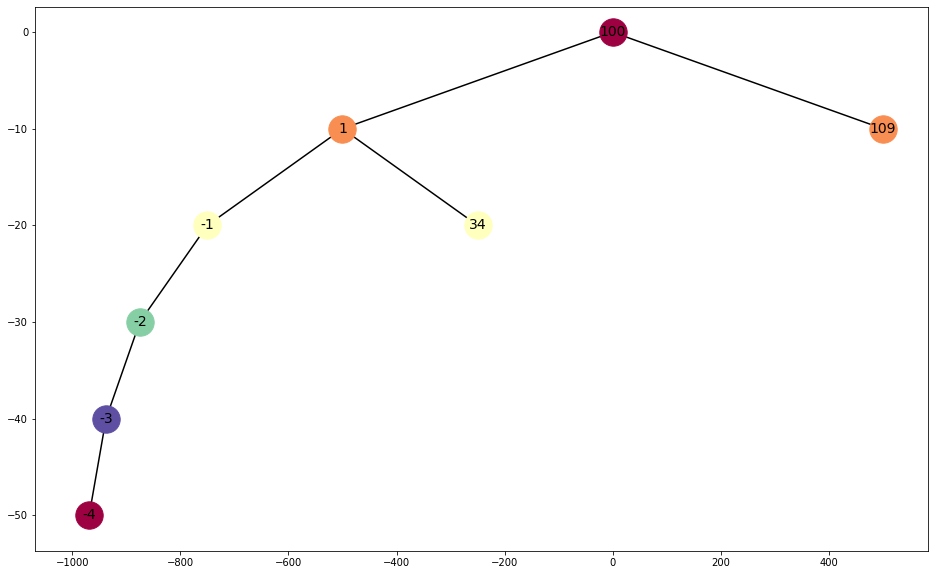

New node data: 1
New node data: 34
New node data: 109
New node data: -1
New node data: -2
New node data: -3
New node data: -4


KeyboardInterrupt: 

In [5]:
root = BinaryTreeNode(float(100), disp=True, colorscheme='byrow')
tree = BinaryTree(root=root)
addNodes(tree)

# Task: Color by Depth

Add functionality to plotTree() that will color the nodes based on their depth.

# Task: Animate tree traversals

Add functionality to your traversal methods, BinaryTreeNode and BinaryTree to support animating the traversals. This should mean that nodes are added to the tree plot as they are visited by the traversal code.

In [15]:
import time

class Queue:
    "This is a queue"
    def __init__(self, size = 0, isEmpty = True):
        self.size = size
        self.isEmpty = isEmpty
        self.data = [None]
        self.head = 0
        self.tail = 0
    def enqueue(self, val):
        if None not in self.data:
            temp = self.data
            self.data = [None] * (2 * len(self.data))
            start = self.head
            for i,_ in enumerate(temp):
                self.data[i] = temp[start%len(temp)]
                start += 1
            self.head = 0
            self.tail = len(temp)
        elif self.tail > len(self.data)-1:
            self.tail = 0
        self.data[self.tail] = val
        self.tail += 1
        self.isEmpty = False
        self.size += 1
    def dequeue(self):
        if not self.isEmpty:
            oldHead = self.data[self.head]
            self.data[self.head] = None
            self.head = (self.head+1)%len(self.data)
            if self.data[self.head] == None:
                self.isEmpty = True
            self.size -= 1
            return oldHead
        else:
            raise Exception("There's no objects here to dequeue.")

def preOrder(node, orderedList=[], disp=False):
    orderedList.append(node.data)
    if disp:
        node.kwargs['colorscheme'] = 'byindex'
        node.kwargs['nodeIndex'] = len(orderedList)-1
        node.plotTree()
    if node.hasLeft():
        preOrder(node.leftChild, orderedList, disp=disp)
    if node.hasRight():
        preOrder(node.rightChild, orderedList, disp=disp)
    return orderedList

def postOrder(node,orderedList=[],disp=False):
    if node.hasLeft():
        postOrder(node.leftChild,orderedList,disp=disp)
    if node.hasRight():
        postOrder(node.rightChild,orderedList,disp=disp)
    orderedList.append(node.data)
    if disp:
        node.kwargs['colorscheme'] = 'byindex'
        node.kwargs['nodeIndex'] = len(orderedList)-1
#         node.kwargs['whichfirst'] = 'child'
        node.plotTree()
    return orderedList

def inOrder(node,orderedList=[],disp=False):
    if node.hasLeft():
        inOrder(node.leftChild,orderedList,disp=disp)
    orderedList.append(node.data)
    if disp:
        node.kwargs['colorscheme'] = 'byindex'
        node.kwargs['nodeIndex'] = len(orderedList)-1
#         node.kwargs['whichfirst'] = 'child'
        node.plotTree()
    if node.hasRight():
        inOrder(node.rightChild,orderedList,disp=disp)
    return orderedList

def bft(root,disp=False):
    orderedList = []
    q = Queue()
    q.enqueue(root)
    while not q.isEmpty:
        node = q.dequeue()
        orderedList.append(node.data)
        if disp:
            node.kwargs['colorscheme'] = 'byindex'
            node.kwargs['nodeIndex'] = len(orderedList)-1
            node.plotTree()
        if node.hasLeft() or node.hasRight():
            for x in node.children():
                q.enqueue(x)
    return orderedList

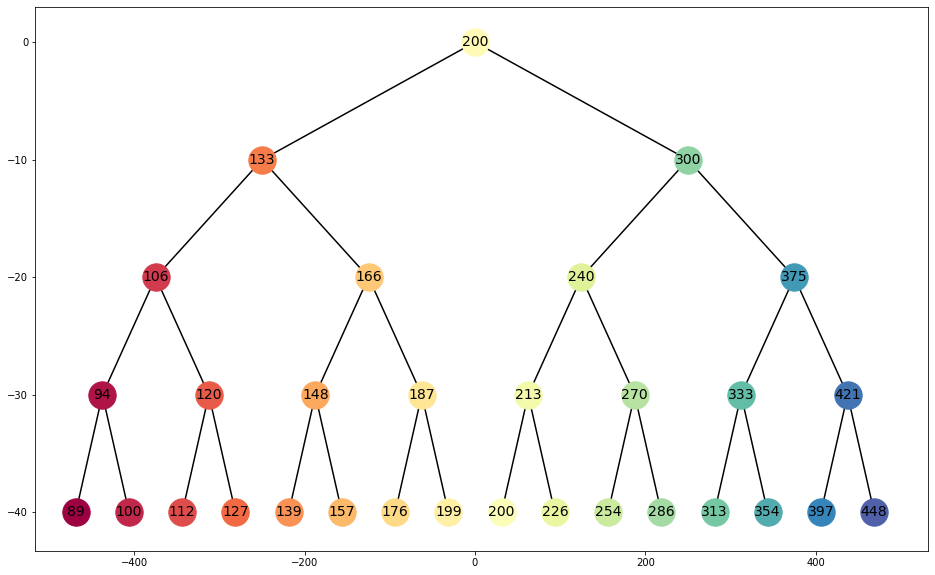

[89.23747276688454,
 94.81481481481482,
 100.74074074074075,
 106.66666666666667,
 112.94117647058823,
 120.0,
 127.5,
 133.33333333333334,
 139.43355119825708,
 148.14814814814815,
 157.40740740740742,
 166.66666666666669,
 176.47058823529414,
 187.50000000000003,
 199.21875000000003,
 200,
 200.7843137254902,
 213.33333333333334,
 226.66666666666669,
 240.0,
 254.11764705882354,
 270.0,
 286.875,
 300.0,
 313.7254901960784,
 333.3333333333333,
 354.16666666666663,
 375.0,
 397.05882352941177,
 421.875,
 448.2421875]

In [16]:
def addRight(node):
    val = node.data*(1+((1/2)**(node.depth+1)))
#     print(node.depth)
    right = node.setRight(val)
    return right
def addLeft(node):
    val = node.data/(1+((1/2)**(node.depth+1)))
#     print(node.depth)
    left = node.setLeft(val)
    return left
def populateCompleteTree(rootVal,nNodes):
    root = BinaryTreeNode(rootVal)
    tree = root.tree
    #Write code to populate a binary complete tree with nNodes number of nodes.
    leaves = [root]
    while root.tree.numNodes < nNodes:
        node = leaves.pop(0)
        right = addRight(node)
        left = addLeft(node)
        leaves.append(right)
        leaves.append(left)
    return root, tree

root, tree = populateCompleteTree(200,31)
inOrder(root,disp=True)

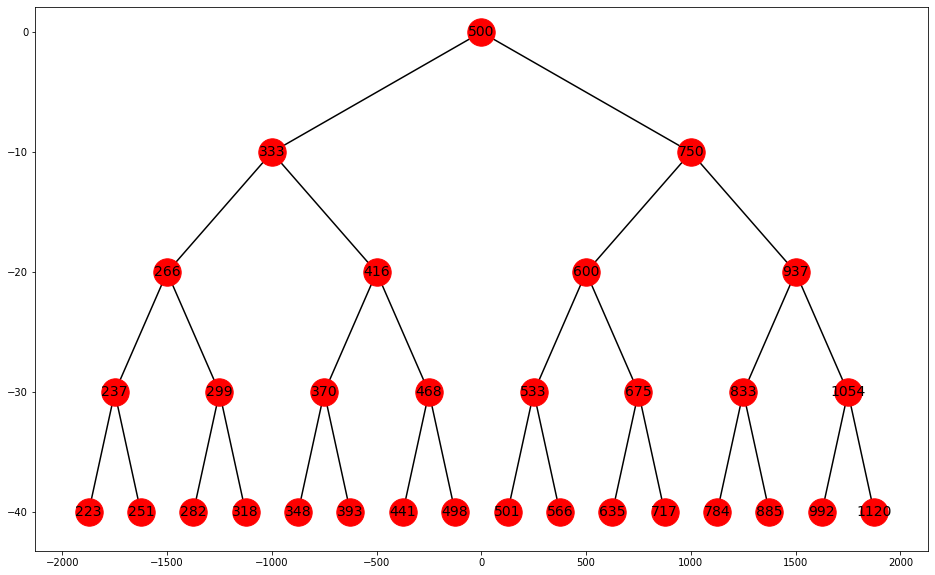

In [40]:
def addCompleteTree(rootVal,nNodes):
    root = BinaryTreeNode(rootVal)
    tree = root.tree
    root.plotTree()
    #Write code to populate a binary complete tree with nNodes number of nodes.
    leaves = [root]
    while root.tree.numNodes < nNodes:
        node = leaves.pop(0)
        left = addLeft(node)
        left.plotTree()
        right = addRight(node)
        right.plotTree()
        leaves.append(left)
        leaves.append(right)
    return root, tree

root,tree = addCompleteTree(500,31)